Team Members: Blue Bai, Chan Khine, Huiqiong Wu, Kyle Lei

# Walmart Data Info

Walmart Sales Data Link: https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/data <br>
The dataset includes historical data for 45 Walmart stores and each store contains a number of departments. <br>
The data file comes with four different datasets.
1) Stores
    - anonymized information about the 45 stores, indicating the type and size of store
2) Train
    - historical training data from 2010-02-05 to 2012-11-01.
    - Columns:
        - Store: the store number
        - Dept: the department number
        - Date: the week
        - Weekly_Sales: sales for the given department in the given store
        - IsHoliday: whether the week is a special holiday week
3) Test
    - same columns as train dataset except Weekly Sales
4) Features
    - additional data 
    - Columns:
        - Store: the store number
        - Date: the week
        - Temperature: average temperature in the region
        - Fuel_Price: cost of fuel in the region
        - MarkDown1-5: anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
        - CPI: the consumer price index
        - Unemployment: the unemployment rate
        - IsHoliday: whether the week is a special holiday week

# Objective

To compare the performance of the following models on Walmart data:
1) Linear Regression
2) Ridge Regression
3) Kernel Ridge Regression
4) SVM
5) Decision Tree
6) Random Forest

### Imports

In [1]:
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import pandas as pd
import numpy as np
import time

# train test split
from sklearn.model_selection import train_test_split

# cross validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

# scalers
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# grid Search
from sklearn.model_selection import GridSearchCV

# models

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# kernel ridge
from sklearn.kernel_ridge import KernelRidge

# SVM
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

# trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
# load data
features = pd.read_csv('features.csv')
features.set_index(features['Date'])
features.set_index(features['Store'])
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
features.shape

(8190, 12)

In [5]:
target = pd.read_csv('train.csv')
target.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
target.shape

(421570, 5)

In [9]:
store = pd.read_csv('stores.csv')
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
# right join features and target data on Date
df = pd.merge(features, target, how = 'right', on=['Date', 'Store'])
df.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1,46039.49,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1,41595.55,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1,19403.54,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1,21827.90,False


In [7]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1,46039.49,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1,41595.55,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1,19403.54,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1,21827.90,False


In [13]:
# left join df and store on Store
df = df.drop(['IsHoliday_y'], 1)
df = df.rename(columns={"IsHoliday_x": "IsHoliday"})
walmart = pd.merge(df, store, how = 'left', on=['Store'])
walmart.head()

/var/folders/xk/p06_z1t168n2s_m703g8kcf80000gn/T/ipykernel_12719/294964395.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['IsHoliday_y'], 1)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1,46039.49,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1,41595.55,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1,19403.54,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1,21827.90,A,151315


In [14]:
walmart.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1,46039.49,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1,41595.55,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1,19403.54,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1,21827.90,A,151315


In [15]:
walmart = walmart.fillna(0)

In [16]:
# check N/A values and remove N/A values
walmart.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

In [17]:
# extract 2012 data
walmart['Date'] = pd.to_datetime(walmart['Date'])
walmart['year'] = pd.DatetimeIndex(walmart['Date']).year
walmart.head()
walmart = walmart[walmart['year']==2012]
walmart.head()
walmart = walmart.drop(['year'], 1)
walmart.head()

/var/folders/xk/p06_z1t168n2s_m703g8kcf80000gn/T/ipykernel_12719/140496562.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  walmart = walmart.drop(['year'], 1)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
100,1,2012-01-06,49.01,3.157,6277.39,21813.16,143.10,1450.13,8483.00,219.714258,7.348,False,1,16567.69,A,151315
101,1,2012-01-13,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,7.348,False,1,16894.40,A,151315
102,1,2012-01-20,54.11,3.268,4139.87,2807.19,33.88,500.62,3400.21,219.985689,7.348,False,1,18365.10,A,151315
103,1,2012-01-27,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,220.078852,7.348,False,1,18378.16,A,151315
104,1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,1,23510.49,A,151315


In [18]:
print(len(walmart))

127438


In [20]:
# checking the number of different values in each column
walmart.nunique()

Store               45
Date                43
Temperature       1316
Fuel_Price         323
MarkDown1         1925
MarkDown2         1252
MarkDown3         1351
MarkDown4         1658
MarkDown5         1934
CPI                645
Unemployment       118
IsHoliday            2
Dept                81
Weekly_Sales    116950
Type                 3
Size                40
dtype: int64

# Data Visualization

Categorical Variables

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

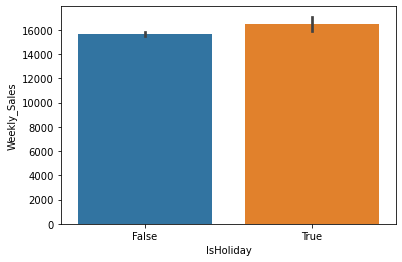

In [19]:
# Holiday or not
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=walmart)

It seems that weekly sales increase during holidays, but it is not a significant increase.

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

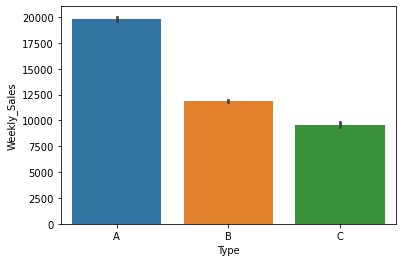

In [16]:
# Type
sns.barplot(x='Type', y='Weekly_Sales', data=walmart)

It seems that weekly sales increase the most if Type is A, followed by Type B and Type C.

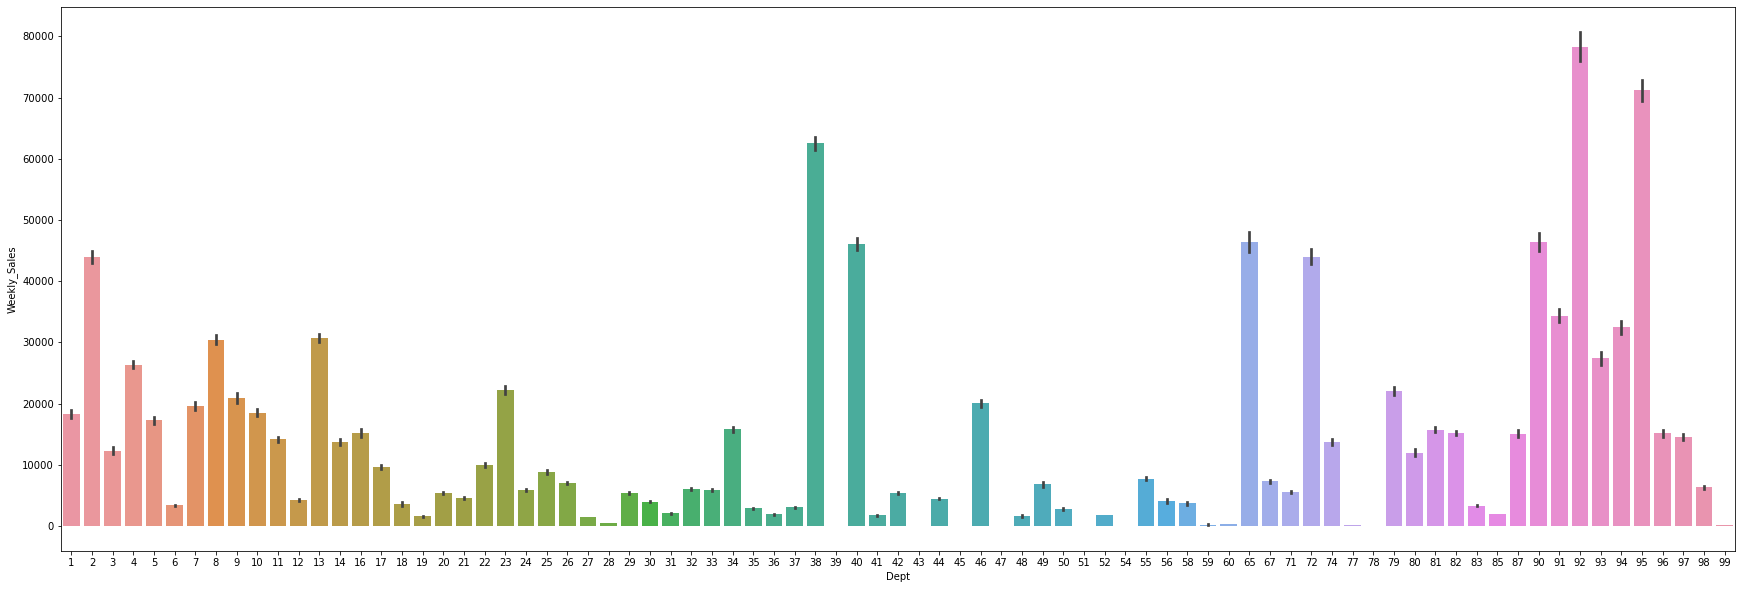

In [17]:
# Department
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=walmart)

From the above bar graph, we can clearly see that some departments such as 2,4, and 19 have high weekly sales. Some departments such as 3,5, and 33 have low weekly sales.

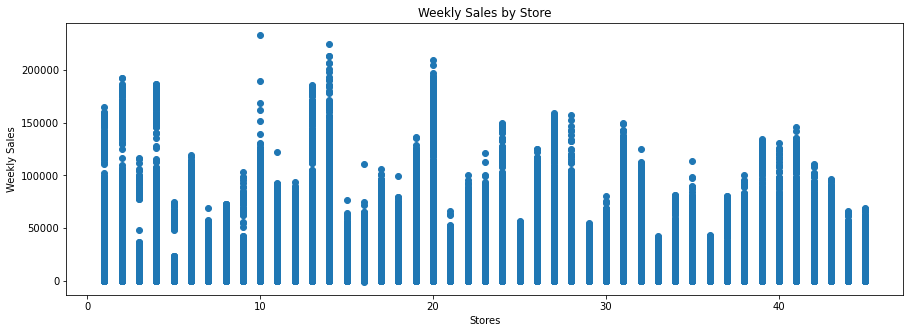

In [18]:
# Store
x = walmart['Store']
y = walmart['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

We can see a few stores have high weekly sales. The highest sales for most stores is between 50,000 to 100,000.

Numeric Variables

<AxesSubplot:xlabel='Fuel_Price'>

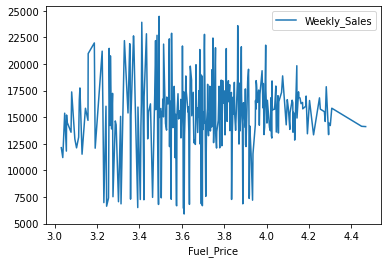

In [19]:
fuel_price = pd.pivot_table(walmart, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

The line chart between weekly sales and fuel price is fluctuating a lot and there is no visible trend.

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

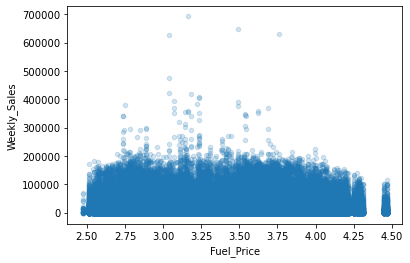

In [20]:
df.plot.scatter(x="Fuel_Price",y="Weekly_Sales", alpha=0.2)

<AxesSubplot:xlabel='Temperature'>

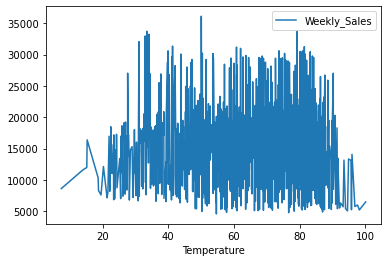

In [21]:
temp = pd.pivot_table(walmart, values = "Weekly_Sales", index= "Temperature")
temp.plot()

The line chart between weekly sales and temperature is fluctuating a lot and there is no visible trend.

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

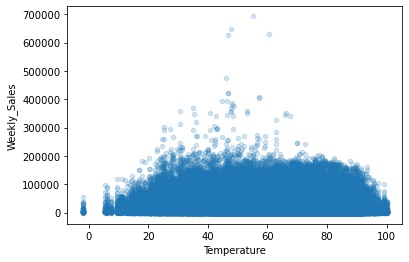

In [22]:
df.plot.scatter(x="Temperature",y="Weekly_Sales", alpha=0.2)

<AxesSubplot:xlabel='CPI'>

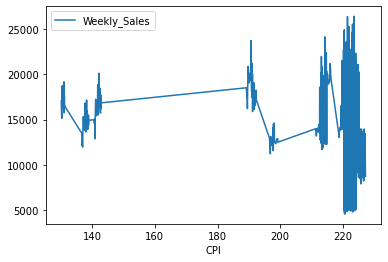

In [23]:
CPI = pd.pivot_table(walmart, values = "Weekly_Sales", index= "CPI")
CPI.plot()

The line chart between weekly sales and CPI is fluctuating a lot and there is no visible trend. The weekly sales are also cluster around some CPI values only.

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

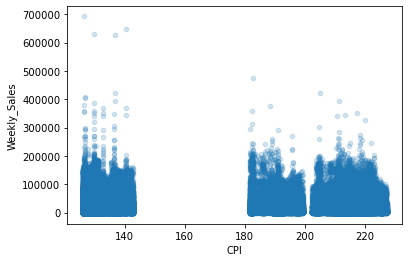

In [24]:
df.plot.scatter(x="CPI",y="Weekly_Sales", alpha=0.2)

<AxesSubplot:xlabel='Unemployment'>

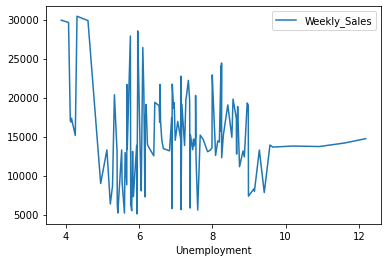

In [25]:
unemployment = pd.pivot_table(walmart, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

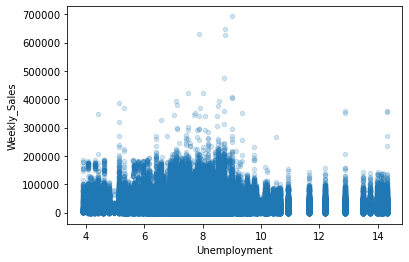

In [26]:
df.plot.scatter(x="Unemployment",y="Weekly_Sales", alpha=0.2)

The line chart between weekly sales and Unemployment is fluctuating a lot and there is no visible trend. There seems to be a non linear relationship.



<AxesSubplot:xlabel='Size'>

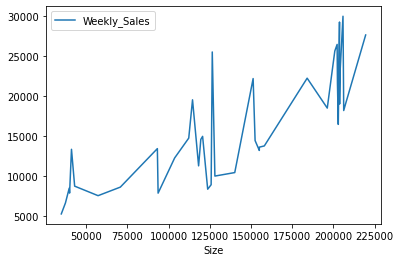

In [27]:
size = pd.pivot_table(walmart, values = "Weekly_Sales", index= "Size")
size.plot()

The line chart between weekly sales and size shows a positive linear relationship.

<AxesSubplot:>

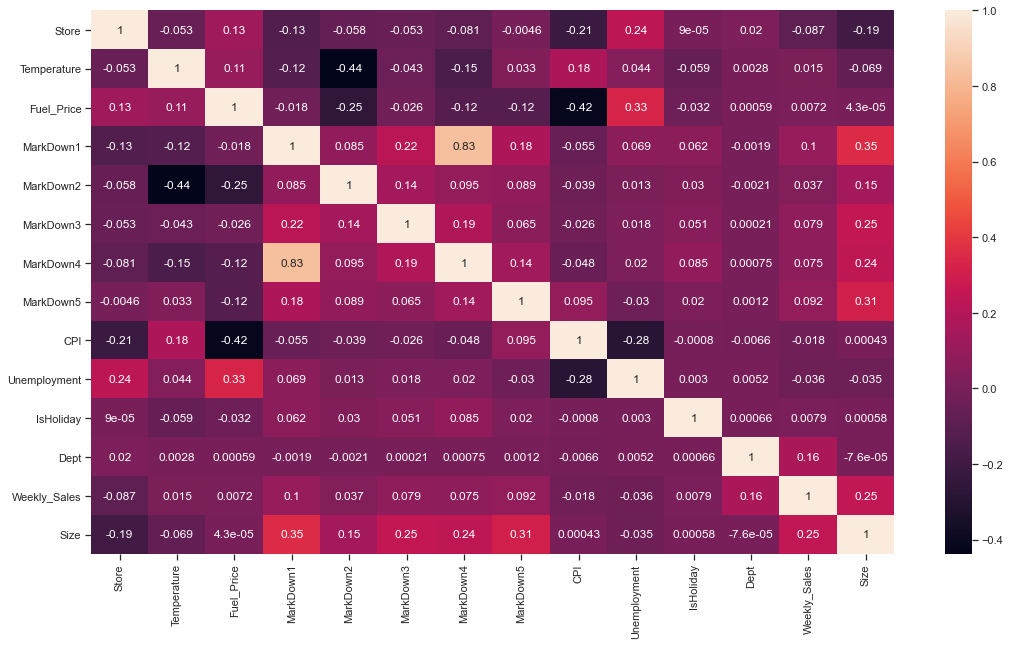

In [44]:
plt.figure(figsize = (18,10))
sns.heatmap(walmart.corr(), annot=True)

After looking through the heatmap, it seems that MarkDown4 is highly correlated with MarkDown1. To avoid collinearity issue, we will drop MarkDown4.

# Random Sample

Since there are 127,008 rows in our dataset, we took a random sample of 1% of our current dataset which is 1,270 rows.

In [45]:
sample_size = int(len(walmart)*0.01)
print(sample_size)
walmart_sample = walmart.sample(sample_size,random_state=3)
walmart_sample.head()

1274


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
14920,2,2012-08-03,90.22,3.417,27650.68,164.58,43.02,21801.90,6652.98,221.586980,6.565,False,34,17562.57,A,202307
86677,9,2012-03-16,59.94,3.734,1913.05,1.80,7.33,436.67,14026.36,224.959490,5.667,False,87,13990.82,B,125833
111582,12,2012-09-07,88.52,4.124,17640.02,84.00,46.18,3202.21,2634.17,130.932548,10.926,True,27,1440.30,B,112238
255982,26,2012-06-01,58.51,3.798,4810.90,3.00,110.44,662.30,2964.12,138.113807,7.489,False,93,25719.59,A,152513
209109,22,2012-05-18,61.90,3.899,10611.25,0.00,51.90,1482.63,2464.02,142.097012,7.671,False,14,16828.69,B,119557


<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

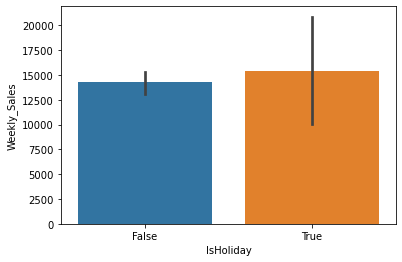

In [15]:
# Holiday or not
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=walmart_sample)

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

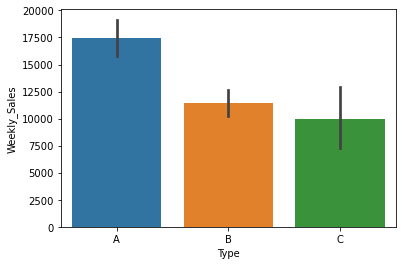

In [16]:
# Type
sns.barplot(x='Type', y='Weekly_Sales', data=walmart_sample)

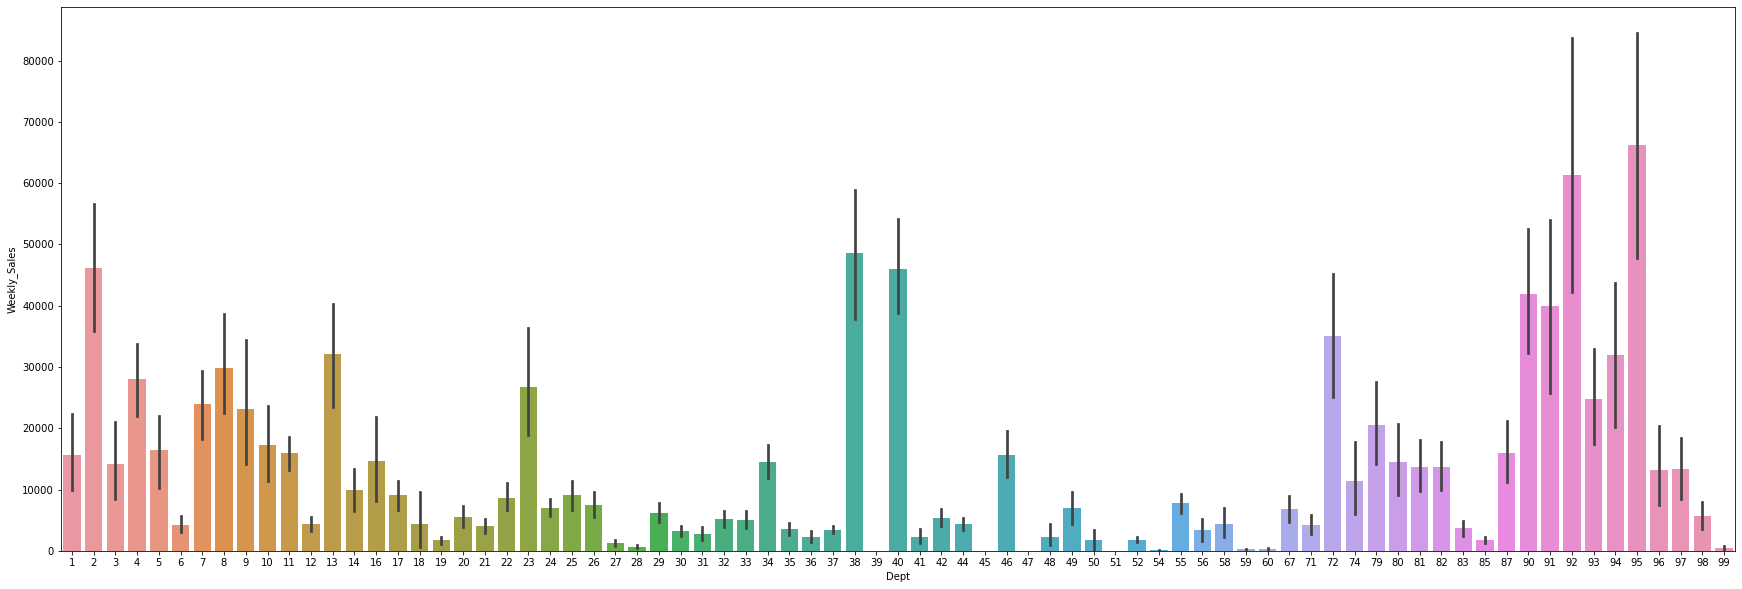

In [17]:
# Department
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=walmart_sample)

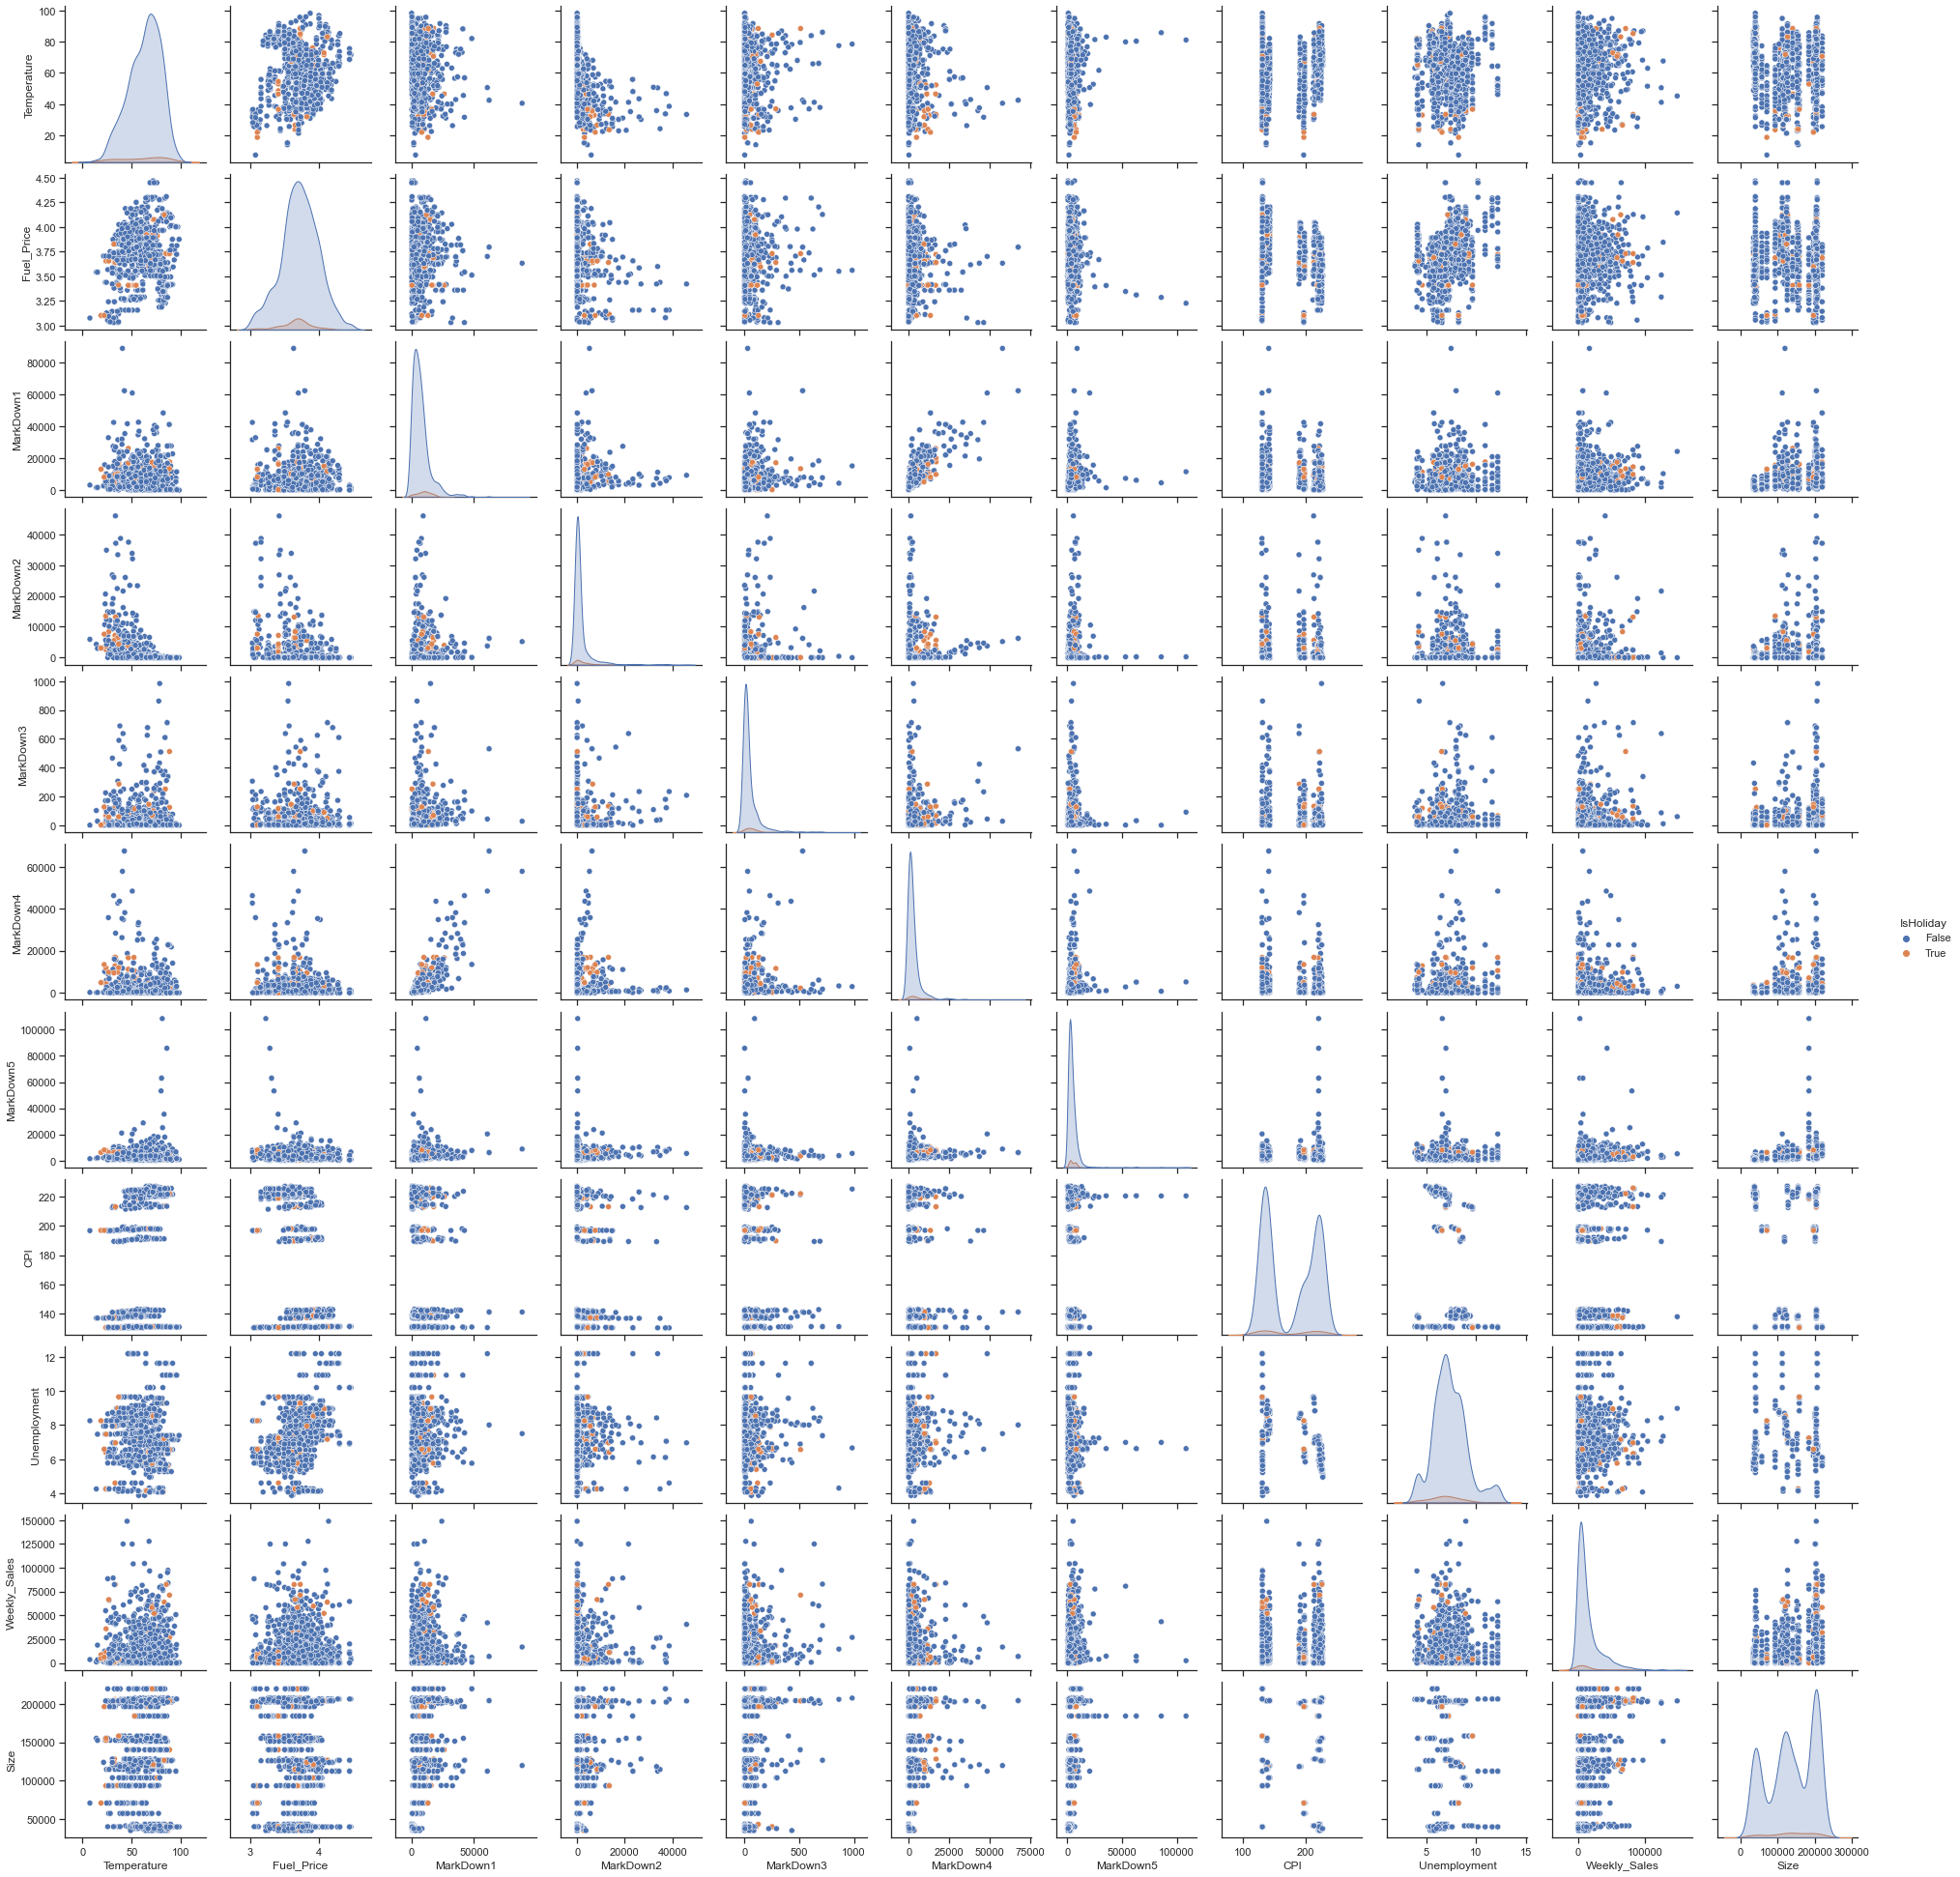

In [43]:
sns.set_theme(style="ticks")

sns.pairplot(walmart_sample, hue="IsHoliday")

Most of the trend for the visulizations in the random sample subset is similar to that of the whole dataset. So, we decided to drop Date, Temperature, Fuel Price, CPI, Markdown 4, 5 and Unemployment. We use only three markdown because we think that models accuarcy might be affected by the 0 values of all of the markdowns. So, we want to limit those effects.

# Preparation For Modeling

Target Variable:
* Weekly Sales: sales for the given department in the given store <br>
<br>
Features:
* Temperature: average temperature in the region
* Unemployment: the unemployment rate
* MarkDown1,2,3: anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
* IsHoliday: whether the week is a special holiday week
* Type: type of store
* Size: size of store
* Dept: department of store
* Store: the walmart store

In [46]:
walmart_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 14920 to 164038
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         1274 non-null   int64         
 1   Date          1274 non-null   datetime64[ns]
 2   Temperature   1274 non-null   float64       
 3   Fuel_Price    1274 non-null   float64       
 4   MarkDown1     1274 non-null   float64       
 5   MarkDown2     1274 non-null   float64       
 6   MarkDown3     1274 non-null   float64       
 7   MarkDown4     1274 non-null   float64       
 8   MarkDown5     1274 non-null   float64       
 9   CPI           1274 non-null   float64       
 10  Unemployment  1274 non-null   float64       
 11  IsHoliday     1274 non-null   bool          
 12  Dept          1274 non-null   int64         
 13  Weekly_Sales  1274 non-null   float64       
 14  Type          1274 non-null   object        
 15  Size          1274 non-null   in

In [47]:
walmart_sample.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

In [48]:
walmart_Dummies_df = pd.get_dummies(walmart_sample,drop_first=False)
walmart_Dummies_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Type_A,Type_B,Type_C
14920,2,2012-08-03,90.22,3.417,27650.68,164.58,43.02,21801.90,6652.98,221.586980,6.565,False,34,17562.57,202307,1,0,0
86677,9,2012-03-16,59.94,3.734,1913.05,1.80,7.33,436.67,14026.36,224.959490,5.667,False,87,13990.82,125833,0,1,0
111582,12,2012-09-07,88.52,4.124,17640.02,84.00,46.18,3202.21,2634.17,130.932548,10.926,True,27,1440.30,112238,0,1,0
255982,26,2012-06-01,58.51,3.798,4810.90,3.00,110.44,662.30,2964.12,138.113807,7.489,False,93,25719.59,152513,1,0,0
209109,22,2012-05-18,61.90,3.899,10611.25,0.00,51.90,1482.63,2464.02,142.097012,7.671,False,14,16828.69,119557,0,1,0


In [49]:
#Change the type of store and dept into category
walmart_sample['Store'] = walmart_sample['Store'].astype('category')
walmart_sample['Dept'] = walmart_sample['Store'].astype('category')

In [50]:
# drop date
walmart_Dummies_df = walmart_Dummies_df.drop(['Date'],1)

In [51]:
walmart_Dummies_df.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Type_A,Type_B,Type_C
14920,2,90.22,3.417,27650.68,164.58,43.02,21801.90,6652.98,221.586980,6.565,False,34,17562.57,202307,1,0,0
86677,9,59.94,3.734,1913.05,1.80,7.33,436.67,14026.36,224.959490,5.667,False,87,13990.82,125833,0,1,0
111582,12,88.52,4.124,17640.02,84.00,46.18,3202.21,2634.17,130.932548,10.926,True,27,1440.30,112238,0,1,0
255982,26,58.51,3.798,4810.90,3.00,110.44,662.30,2964.12,138.113807,7.489,False,93,25719.59,152513,1,0,0
209109,22,61.90,3.899,10611.25,0.00,51.90,1482.63,2464.02,142.097012,7.671,False,14,16828.69,119557,0,1,0


In [55]:
#Setting target variable and features
X = walmart_Dummies_df.drop(['Weekly_Sales','CPI','MarkDown4','MarkDown5','Fuel_Price'],axis=1)
y = walmart_Dummies_df['Weekly_Sales']
# data partition
X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=0,test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(955, 12)
(319, 12)


In [27]:
nmc = 100
testSize = 0.25

# Linear regression

In [53]:
lr = LinearRegression()

shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize, random_state=0)
CVInfo = cross_validate(lr, X_train, y_train, cv=shuffle,return_train_score=True)
print('X,y')
print('Train Score:',np.mean(CVInfo['train_score']))
print('Test Score:',np.mean(CVInfo['test_score']))

lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))


X,y
Train Score: 0.09412245190969028
Test Score: 0.04926597290888053
0.08267638246399867


The train and test score is pretty low. It also seems to have some overfitting issues, but not a lot.

# Ridge model with MinMaxScaler

In [33]:
# set up Pipeline
scaler = Pipeline([
        ("MinMax_scaler", MinMaxScaler()),
        ("Ridge", Ridge()),   
        ])
# set up dictionary for grid search
# Names from pipeline are used for parameters
# This can sweep across multiple hyperparameters (for now just alpha)
param_grid={'Ridge__alpha':[0.0001,10,100,300]}
# set up cross-validation shuffles (hold to 50 splits)
shuffle_split = ShuffleSplit(test_size=testSize, n_splits=nmc,random_state = 1)
# set up search
grid_search=GridSearchCV(scaler,param_grid,cv=shuffle_split,
                              return_train_score=True,n_jobs=-1)
# implement search (again use trainValid data)
grid_search.fit(X_train, y_train)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_Ridge__alpha']])

# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

# This is best model
best_model = grid_search.best_estimator_

   rank_test_score  mean_test_score param_Ridge__alpha
0                2         0.055086             0.0001
1                1         0.060162                 10
2                3         0.043864                100
3                4         0.028709                300
best param: {'Ridge__alpha': 10}
best model: Pipeline(steps=[('MinMax_scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=10))])
best test score: 0.06016249295150785


From ridge model we can see that it can help imporve the accuracy of the linear model but the test score is still very low.

# Kernel Ridge

In [37]:
score_used = 'r2' 

shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
# Set up pipeline with StandardScaler

fullModel = make_pipeline(StandardScaler(),KernelRidge())

# set up dictionary for grid search
param_grid={'kernelridge__alpha':[0.01,0.05,0.25, 0.5],'kernelridge__gamma':[0.01,0.05,0.25,0.5],'kernelridge__kernel':['rbf']}

# set up cross-validation shuffles
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=nmc)

# set up search
grid_search=GridSearchCV(fullModel,param_grid,cv=shuffle_split,scoring=score_used, 
                              return_train_score=True,n_jobs=1)
# implement search

grid_search.fit(X,y)


# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
presults = results[['rank_test_score','mean_test_score','param_kernelridge__alpha','param_kernelridge__gamma']]
print("best params and score")
print(grid_search.best_params_)
print(grid_search.best_score_)
print(presults)

best params and score
{'kernelridge__alpha': 0.05, 'kernelridge__gamma': 0.01, 'kernelridge__kernel': 'rbf'}
0.1507562575211605
    rank_test_score  mean_test_score param_kernelridge__alpha  \
0                 3         0.140668                     0.01   
1                12         0.008219                     0.01   
2                15        -0.273712                     0.01   
3                16        -0.300023                     0.01   
4                 1         0.150756                     0.05   
5                 7         0.096601                     0.05   
6                13        -0.053587                     0.05   
7                14        -0.087508                     0.05   
8                 5         0.123402                     0.25   
9                 4         0.138135                     0.25   
10                9         0.060417                     0.25   
11               11         0.026091                     0.25   
12                6        

We try to implement Kernel Ridge model here to furthur improve our model. However, from the best result(0.15) we can see that, the test score is still very low. Even though kernel ridge linear regression seems to give a better test score over simple linear regression, it is only a few percentage point difference. This might be because there might be some non-linear relationships or clusters in the data that these models are not capturing.

# SVM

In [38]:
#svm_reg = LinearSVR(epsilon=1.5)
#svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
# Build pipeline
#   Note: model names are given names, but all small letters (odd system)
fullModel = Pipeline([('scaler', StandardScaler()), ('svm', LinearSVR())])
# fullModel = make_pipeline(StandardScaler(),LinearSVC())
# set up dictionary for grid search
#  dictionary name must now include pipeline function name then __
param_grid={'svm__C': [0.1,0.25,0.5,1.0,2.0,3.0,5.0],
            'svm__epsilon': [0.0001, 0.0005,  0.001, 0.005,  0,0.01, 0.05, 1, 5, 10]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=testSize,n_splits=nmc)
# set up search
grid_search=GridSearchCV(fullModel,param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)

# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
#print(results)

# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

# This is best model
best_model = grid_search.best_estimator_

best param: {'svm__C': 5.0, 'svm__epsilon': 0.001}
best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', LinearSVR(C=5.0, epsilon=0.001))])
best test score: -0.3833117078718725


In [39]:
fullModel = Pipeline([('scaler', StandardScaler()), ('svm', SVR(kernel="rbf", max_iter=-1))])
# fullModel = make_pipeline(StandardScaler(),LinearSVC())
# set up dictionary for grid search
#  dictionary name must now include pipeline function name then __
Clist = [0.1,0.25,0.5,1.0,2.0,3.0,5.0]
param_grid={'svm__C': [0.1, 1, 10, 100, 1000],
            'svm__epsilon': [0.0001, 0.0005,  0.001, 0.005,  0.01, 0.05, 1, 5, 10]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=testSize,n_splits=nmc)
# set up search
grid_search=GridSearchCV(fullModel,param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)

# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results)

# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

# This is best model
best_model = grid_search.best_estimator_

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svm__C  \
0        0.048505      0.002246         0.033299        0.001895          0.1   
1        0.047121      0.001172         0.032608        0.002082          0.1   
2        0.046869      0.000592         0.032658        0.002038          0.1   
3        0.046864      0.000638         0.032573        0.002094          0.1   
4        0.046794      0.000584         0.032582        0.002132          0.1   
5        0.047229      0.001991         0.032383        0.001909          0.1   
6        0.046815      0.000635         0.032811        0.002279          0.1   
7        0.047398      0.004010         0.032541        0.002072          0.1   
8        0.047505      0.001483         0.032714        0.002053          0.1   
9        0.047410      0.001061         0.032861        0.002034            1   
10       0.047082      0.000664         0.034460        0.018082            1   
11       0.047223      0.000

Here, we try to use SVM regression and SVM kernel model to improve our prediction. However, it seems SVM does not preform well here. So we turn to tree models.

# Decision Tree 

In [41]:
n_splits =100
test_size = 0.25

In [54]:
#using grid search to find the best parameters for decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
maxDepth = np.arange(1,20,1)
param_grid={'max_depth':maxDepth}

cvf = ShuffleSplit(test_size=test_size,n_splits=n_splits)
# set up search
grid_search=GridSearchCV(dtr,param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_depth']])

# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

    rank_test_score  mean_test_score param_max_depth
0                19         0.100149               1
1                18         0.239874               2
2                17         0.348586               3
3                12         0.393142               4
4                13         0.393075               5
5                 7         0.404738               6
6                 1         0.443708               7
7                 2         0.437113               8
8                 3         0.432549               9
9                 4         0.417238              10
10                6         0.405690              11
11                5         0.408506              12
12               11         0.395022              13
13                8         0.397694              14
14               16         0.389047              15
15               10         0.395087              16
16               14         0.392786              17
17                9         0.396176          

In [51]:
# This is best decision tree model 
best_model = grid_search.best_estimator_

# Rerun cross validation for this model just to check
CVInfo = cross_validate(best_model, X,y, cv=shuffle,return_train_score=True,n_jobs=-1)

print("Train score for best model:",np.mean(CVInfo['train_score']))
print("Test score for best model:",np.mean(CVInfo['test_score']))

Train score for best model: 0.8100366936592436
Test score for best model: 0.47405392258051327


From the results above we can see that, the test result has been improved a lot compared to other models. Thus, we decide to try a ensemble tree model to furthur improve the performence.

# Random Forest 

In [81]:
#now, fit the data into random forest model
#using grid search to find the best parameters for random forest
maxDepth = np.arange(12,15,1)
n_estimators = np.arange(140,190,20)
random_state = np.arange(70,110,10)
max_features = [10]
rf = RandomForestRegressor()
param_grid={'max_depth':maxDepth,'n_estimators':n_estimators,'random_state':random_state,'max_features':max_features}

cvf = ShuffleSplit(test_size=test_size,n_splits=n_splits)
# set up search
grid_search=GridSearchCV(rf,param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_depth','param_n_estimators','param_random_state','param_max_features']])

# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

    rank_test_score  mean_test_score param_max_depth param_n_estimators  \
0                36         0.656251              12                140   
1                33         0.657104              12                140   
2                31         0.657446              12                140   
3                27         0.657795              12                140   
4                35         0.656699              12                160   
5                32         0.657217              12                160   
6                24         0.657979              12                160   
7                28         0.657735              12                160   
8                34         0.656897              12                180   
9                30         0.657534              12                180   
10               20         0.658115              12                180   
11               25         0.657961              12                180   
12               29      

In [96]:
best_model = grid_search.best_estimator_

# Rerun cross validation for this model just to check
CVInfo = cross_validate(best_model, X,y, cv=shuffle,return_train_score=True,n_jobs=-1)

print("Train score for best model:",np.mean(CVInfo['train_score']))
print("Test score for best model:",np.mean(CVInfo['test_score']))

Train score for best model: 0.9514945434840647
Test score for best model: 0.6582450794810056


From the result above, we received the best test score so far, which is 0.6582.
Therefore, we can conclude that this walmart sales data is more suitable for non linear models, like decision tree and random forest.

# Conclusion

The ranking of our models are as follow:
1) Random Forest
2) Decision Tree
3) Kernel Ridge Regression
4) Ridge Regression
5) Linear Regression
6) SVM

For Walmart data, SVM regression gives the worst performance. It may be beacuse as we see in the data visualizations, most of the features are not showing any visible trends. Since most of the data points are cluttered near a range of low weekly sales, it may be difficult for SVM to find a best fit line that contains the maximum number of datapoints. Similarly, linear and kernel ridge shows the second worse performance since we did not add any non-linear features. Kernel ridge captures some non-linear features, but we might need to add interaction or cluster variables. Since decision trees and random forest captures non linear features as well as take care of the interaction within the features and clusters, their performance is a big improvement from other models. However, it should be note that even though the performance is better, they also seem to have more overfitting issues than other models.